In [1]:
import pandas as pd
import numpy as np

In [4]:
olist_customers = pd.read_csv("../data/raw/archive/olist_customers_dataset.csv")
olist_geolocation = pd.read_csv("../data/raw/archive/olist_geolocation_dataset.csv")
olist_order_items = pd.read_csv("../data/raw/archive/olist_order_items_dataset.csv")
olist_order_payments = pd.read_csv("../data/raw/archive/olist_order_payments_dataset.csv")
olist_order_reviews = pd.read_csv("../data/raw/archive/olist_order_reviews_dataset.csv")
olist_orders = pd.read_csv("../data/raw/archive/olist_orders_dataset.csv")
olist_products = pd.read_csv("../data/raw/archive/olist_products_dataset.csv")
olist_sellers = pd.read_csv("../data/raw/archive/olist_sellers_dataset.csv")
olist_product_name_translation = pd.read_csv("../data/raw/archive/product_category_name_translation.csv")

In [9]:
olist_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [43]:
olist_product_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [47]:
olist_products_renamed = olist_products.merge(right=olist_product_name_translation, how="left", on="product_category_name")
olist_products_renamed.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [49]:
olist_products_renamed.to_csv("../data/processed/olist_products_dataset_english.csv")

In [56]:
product_category_freq = pd.DataFrame(olist_products_renamed['product_category_name_english'].value_counts())
product_category_freq.head()

,product_category_name_english
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

/Users/diego/miniforge3/envs/tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Frequency of Purchases of Product Categories, in Descending Order')

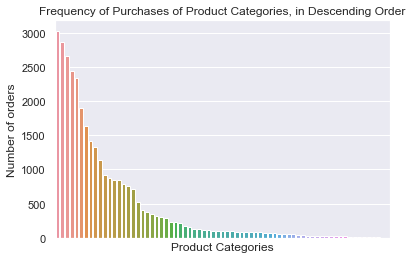

In [68]:
ax = sns.barplot(product_category_freq.index, product_category_freq['product_category_name_english'])
ax.set(xticks=[])
sns.set_style("dark")

ax.set_xlabel("Product Categories")
ax.set_ylabel("Number of orders")
ax.set_title("Frequency of Purchases of Product Categories, in Descending Order")